## Syria Tel Customer Churning Analysis

## Business Understanding for Syriatel Churn Analysis
Syriatel's Business and the Impact of Emerging Technologies
Syriatel is a leading telecommunications company in Syria, providing a range of services including mobile and fixed-line telephony, internet access, and data services. As a state-owned enterprise, Syriatel plays a crucial role in the country's communication infrastructure.
Understanding the Problem:

Churn, or customer attrition, is a significant concern for telecommunications companies like Syriatel. When customers leave, it directly impacts revenue, brand reputation, and overall business health. Therefore, understanding the factors driving churn is crucial for developing effective retention strategies.



## Understanding the Problem:

The goal is to predict which Syriatel customers are likely to churn and identify the underlying reasons for this behavior. This information can be used to develop targeted retention strategies and improve overall customer satisfaction.

Key Questions and Corresponding Classification Tasks:

* Which customer segments are most likely to churn?

Classification Task: Predict whether a customer will churn (1) or not (0).
Features: Customer demographics (age, gender, income, location), service usage (call minutes, data usage, SMS), contract terms, and other relevant factors.

* What are the primary reasons for customer churn?

Classification Task: Predict the reason for churn from a set of potential causes (e.g., poor customer service, high prices, network issues).
Features: Customer interactions, service quality metrics, and other relevant indicators.
How can Syriatel improve customer satisfaction and loyalty?

Classification Task: Predict customer satisfaction or loyalty levels based on various factors.
Features: Customer feedback, service usage patterns, and other relevant metrics.

* What is the cost of customer churn to Syriatel?

While not directly a classification task, this question can be addressed using regression analysis to predict the financial impact of churn.
Features: Customer value, revenue generated, and other relevant financial metrics.
Potential Classification Models:


## Key Business Questions:

What are the primary reasons for customer churn at Syriatel? Identifying the root causes will enable targeted interventions.
Which customer segments are most likely to churn? Understanding the characteristics of high-churn segments will help prioritize retention efforts.
How can Syriatel improve customer satisfaction and loyalty to reduce churn? Identifying areas for improvement will inform strategic initiatives.
What is the cost of customer churn to Syriatel? Quantifying the financial impact will help justify investments in retention programs.
Potential Factors Influencing Churn:

Customer demographics: Age, gender, income level, location
Service usage: Call minutes, data usage, SMS, international roaming
Contract terms: Contract length, pricing plans, promotional offers
Customer satisfaction: Customer support interactions, billing issues, network quality
Competitive landscape: Offers from rival telecom companies
Economic factors: Inflation, unemployment rates


## Business Objectives:

* Reduce customer churn rate: Implement strategies to retain existing customers.
* Improve customer satisfaction: Enhance the overall customer experience.
* Optimize pricing and promotional offers: Develop pricing plans that meet customer needs and incentivize loyalty.
* Enhance customer support: Provide timely and effective assistance to address customer concerns.
* Identify at-risk customers: Proactively reach out to customers who are likely to churn.

By addressing these questions and objectives through data analysis, Syriatel can gain valuable insights into customer behavior, develop effective retention strategies, and improve overall business performance.

## Retrieving Data

In [6]:
import pandas as pd
import os
import opendatasets as od

In [7]:
# Assign the Kaggle data set URL into variable
dataset = 'https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset'
# Using opendatasets let's download the data sets
od.download(dataset)

Skipping, found downloaded files in ".\churn-in-telecoms-dataset" (use force=True to force download)


In [8]:
data_dir = '.\churn-in-telecoms-dataset'
os.listdir(data_dir)

['bigml_59c28831336c6604c800002a.csv']

## Importing relevant libraries

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import RFECV

import warnings
warnings.filterwarnings('ignore')

In [10]:
import pandas as pd
file_path = os.path.join(data_dir, 'bigml_59c28831336c6604c800002a.csv')
df = pd.read_csv(file_path)


## Data Understanding

The SyriaTel dataset from Kaggle is composed of a comprehensive set of customer features, providing multifaceted information about customer usage behaviors, preferences, and interactions.

The dataset contains 3333 entries and 21 columns.
The total memory usage of the dataset is approximately 524.2 KB.
The columns represent various customer attributes, including state, account length, area code, phone number, international plan, voice mail plan, number of voice mail messages, call durations and charges for different time periods and international calls, customer service calls, and churn status.
The dataset does not have any missing values, as indicated by the non-null counts.
The data types of the columns include bool, float64, int64, and object.
The bool column represents the churn status, indicating whether a customer discontinued the service (True) or not (False).
The float64 columns represent numerical values for call durations and charges.
The int64 columns represent numerical values for account length, area code, number of voice mail messages, call counts, and customer service calls.
The object columns include state, phone number, international plan, and voice mail plan, which are categorical variables.
By understanding these features and their implications, we can conduct in-depth analyses and predictive modeling to tackle the issue of customer churn.

In [11]:
## checking top details of data set
df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [12]:
## checking details at bootom of data set
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [13]:
# displaying data set information
df.info

<bound method DataFrame.info of      state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
0                yes     

In [14]:
#checking columns
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [15]:
# Checking shape of data set
df.shape

(3333, 21)

In [16]:
# checking data types and establishing if null values exist
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [17]:
pd.set_option('display.max_columns',None)
df = pd.read_csv(file_path)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [18]:
# checking for null values
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [19]:
df.describe

<bound method NDFrame.describe of      state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
0                yes   

In [20]:
df.churn

0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Name: churn, Length: 3333, dtype: bool

In [21]:
churn = df['churn']
churn = []

for i in churn:
    churn.append(int(i))

    


In [22]:
# converting bool to interger
df['churn'] = df['churn'].astype(int)
df.churn



0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: churn, Length: 3333, dtype: int32

## Feature Engineering

In [23]:
# Creating new features; Total charges, Total talktime, Total Calls and Average call duration per customer
df["Total charge"] = df[['total day charge', 'total eve charge', 'total night charge', 'total intl charge']].sum(axis=1)
df["Total Talk time"] = df[['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']].sum(axis=1)
df["Total calls"] = df[['total day calls', 'total eve calls', 'total night calls', 'total intl calls']].sum(axis=1)
df["Avg Call duration"]= df["Total Talk time"] / df["Total calls"]


In [24]:
# confirming addition of new features
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,Total charge,Total Talk time,Total calls,Avg Call duration
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,75.56,717.2,303,2.366997
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,59.24,625.2,332,1.883133
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,62.29,539.4,333,1.619820
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,66.80,564.8,255,2.214902
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,52.09,512.0,359,1.426184


In [25]:
# understanding churn distribution
df["churn"].value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [26]:
# Creating a voice message to call ratio for each customer
df["voice_ms_call_ratio"] = df["number vmail messages"]/ df["Total calls"]

In [27]:
# Creating columns for charges per call for night, day, evening and international calls per customer

df["charge_per_call_night"] = df["total night charge"] / df["total night minutes"]
df["charge_per_call_day"] = df["total day charge"] / df["total day minutes"]
df["charge_per_call_eve"]= df["total eve charge"] / df["total eve minutes"]
df["charge_per_call_intl"] = df["total intl charge"] / df["total intl minutes"]

In [28]:
#confirming addition of features
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn', 'Total charge', 'Total Talk time',
       'Total calls', 'Avg Call duration', 'voice_ms_call_ratio',
       'charge_per_call_night', 'charge_per_call_day', 'charge_per_call_eve',
       'charge_per_call_intl'],
      dtype='object')

In [29]:
#checking information of top of data set
df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,Total charge,Total Talk time,Total calls,Avg Call duration,voice_ms_call_ratio,charge_per_call_night,charge_per_call_day,charge_per_call_eve,charge_per_call_intl
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,75.56,717.2,303,2.366997,0.082508,0.044994,0.170011,0.085005,0.270000
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,59.24,625.2,332,1.883133,0.078313,0.045008,0.169988,0.085013,0.270073
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,62.29,539.4,333,1.619820,0.000000,0.045018,0.170008,0.084983,0.269672
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,66.80,564.8,255,2.214902,0.000000,0.044997,0.170007,0.084976,0.269697
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,52.09,512.0,359,1.426184,0.000000,0.044997,0.170006,0.085030,0.270297


## Checking for outliers

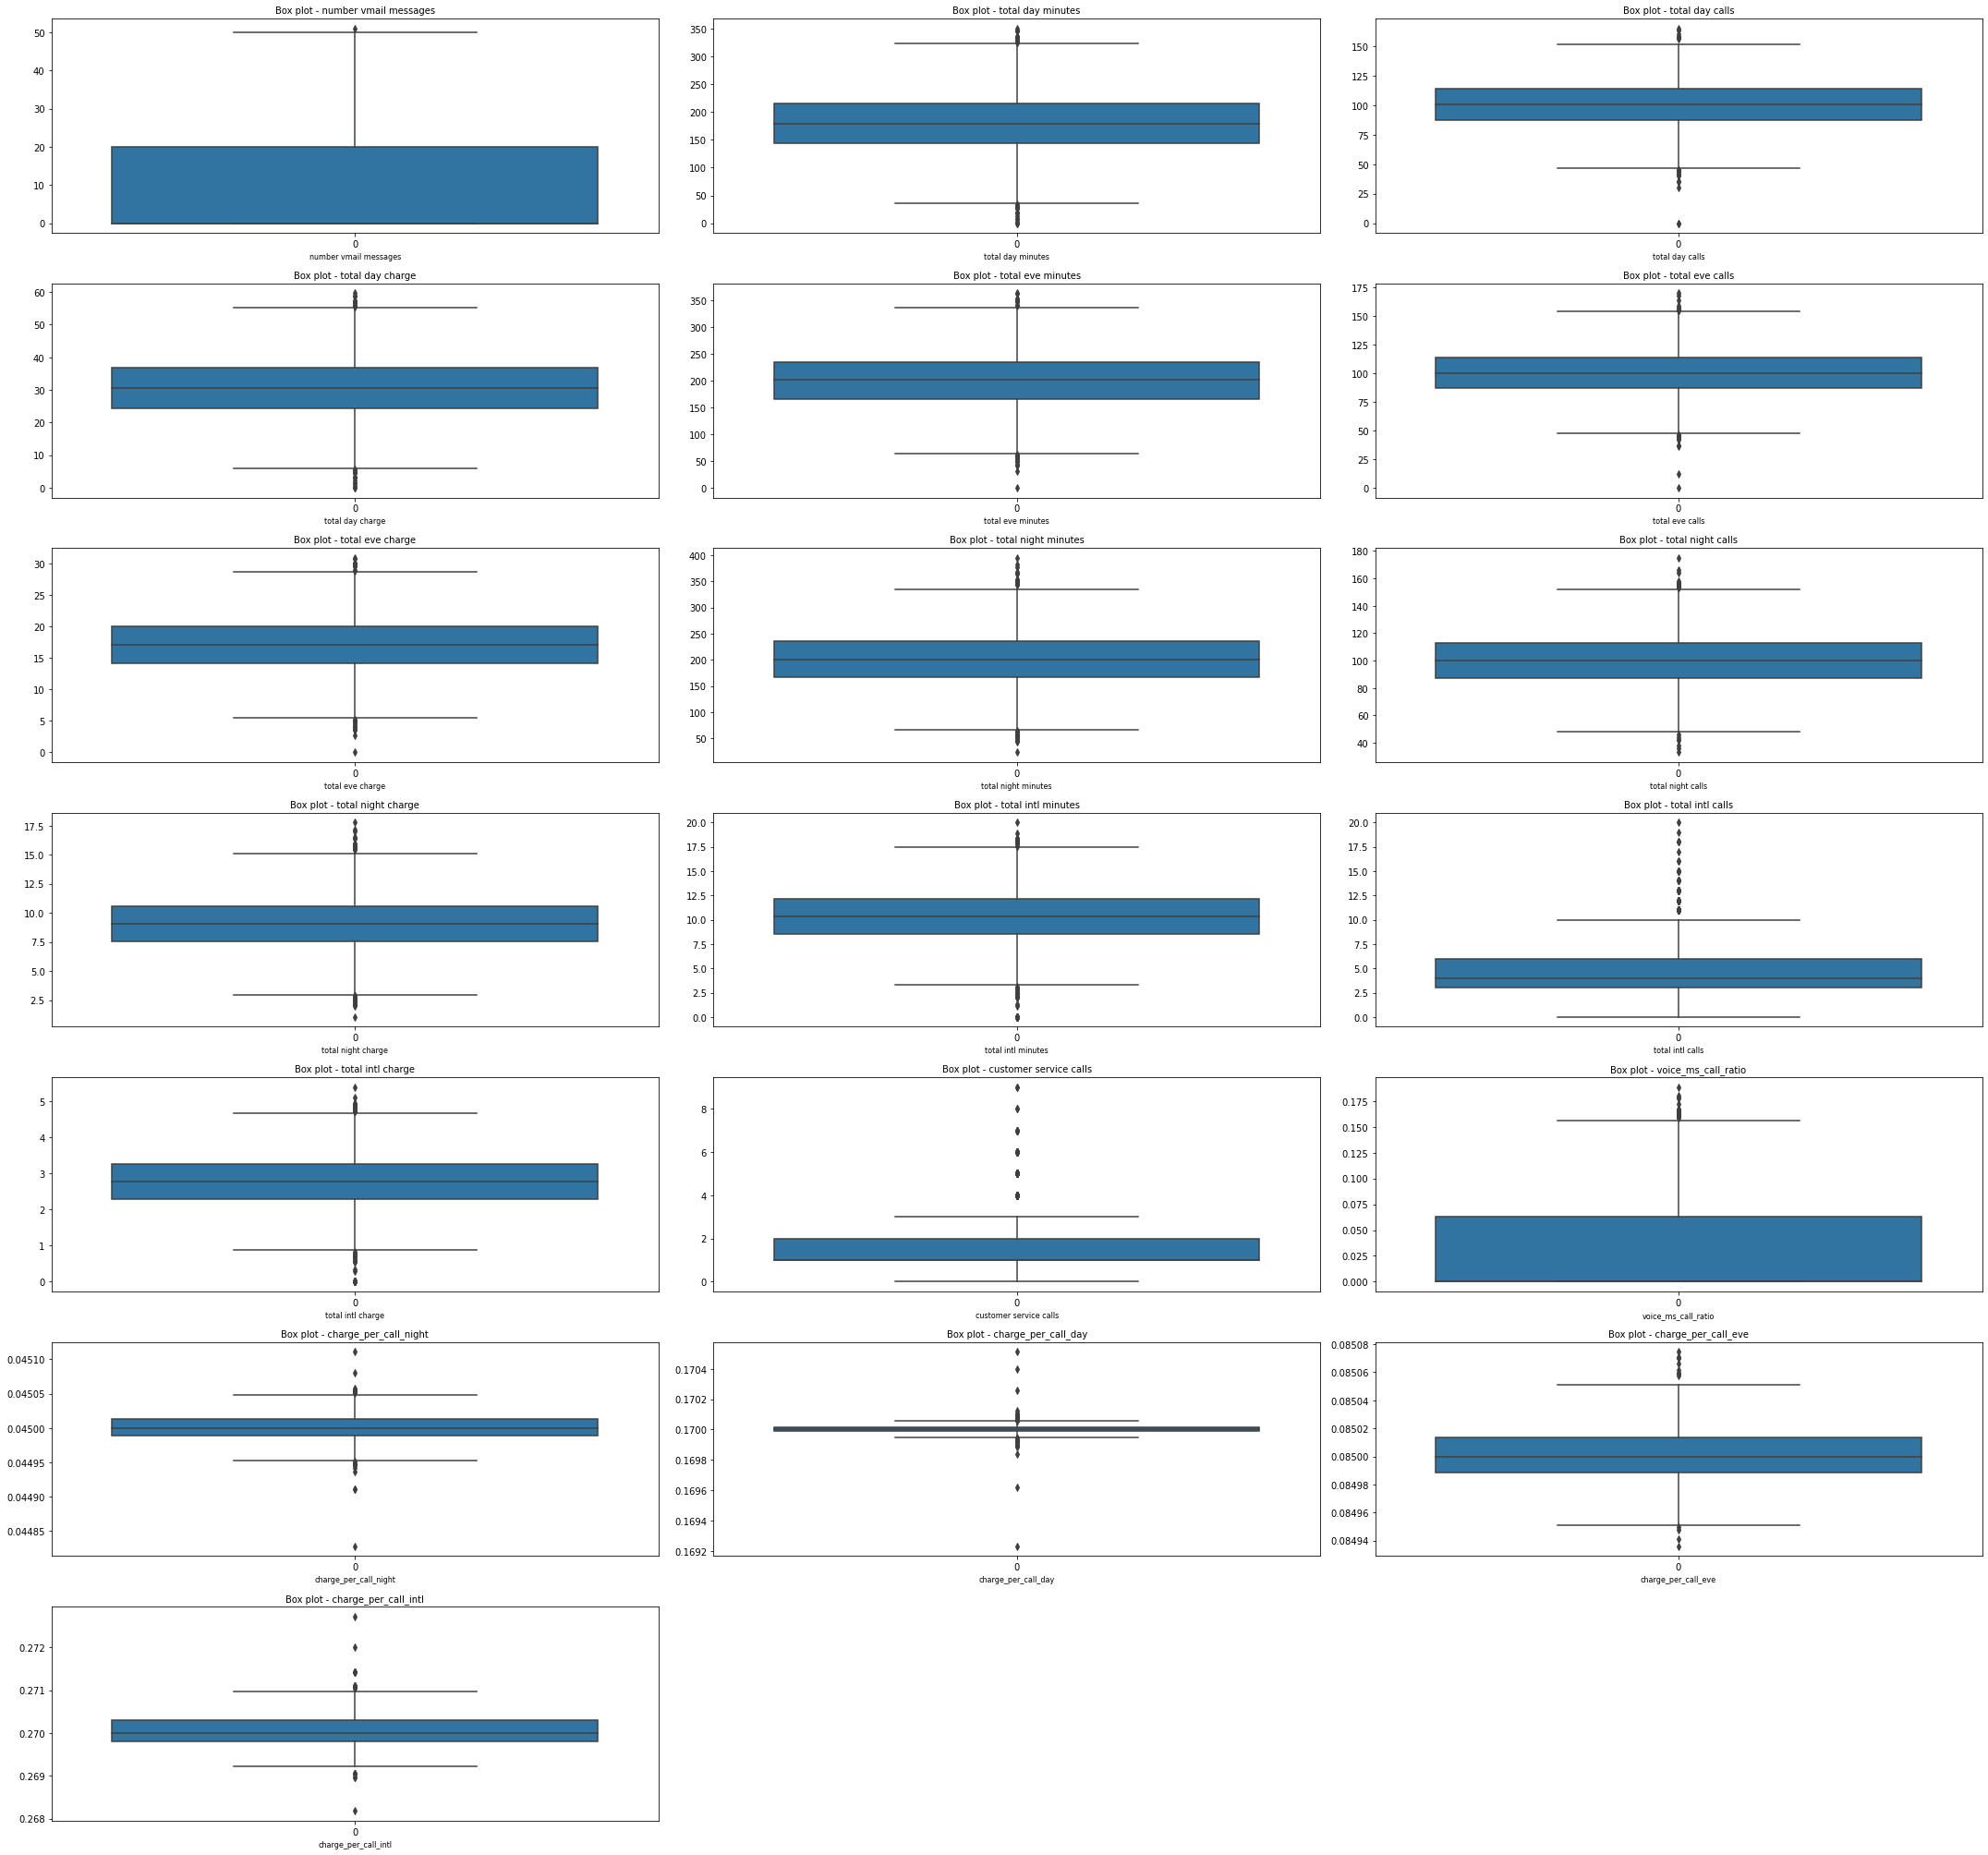

In [30]:
# Columns for our box plots
columns = ['number vmail messages', 'total day minutes', 'total day calls', 'total day charge',
           'total eve minutes', 'total eve calls', 'total eve charge',
           'total night minutes', 'total night calls', 'total night charge',
           'total intl minutes', 'total intl calls', 'total intl charge',
           'customer service calls', 'voice_ms_call_ratio','charge_per_call_night', 
           'charge_per_call_day', 'charge_per_call_eve', 'charge_per_call_intl']

# Calculate the required number of rows and columns for subplots
num_rows = (len(columns) - 1) // 3 + 1
num_cols = min(len(columns), 3)

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10*num_cols, 4*num_rows))

# Generate box plots for each column
for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(data=df[column], ax=axes[row, col])
    axes[row, col].set_title(f'Box plot - {column}', fontsize=10)
    axes[row, col].set_xlabel(column, fontsize=8)

# Remove any empty subplots
if i < (num_rows * num_cols) - 1:
    for j in range(i + 1, num_rows * num_cols):
        fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


In [31]:
from scipy.stats import skew, kurtosis

def descriptive_stats(df, columns):
    stats = df[columns].agg(['mean', 'median', 'std', 'min', 'max']).T
    stats['variance'] = df[columns].var()
    stats['skewness'] = df[columns].apply(lambda x: skew(x.dropna()))
    stats['kurtosis'] = df[columns].apply(lambda x: kurtosis(x.dropna()))
    return stats
columns_to_analyze = [
    'total day minutes', 'total day charge', 'total eve minutes', 
    'total eve charge', 'total night minutes', 'total night charge', 
    'total intl minutes', 'total intl charge', 'number vmail messages', 
    'customer service calls'
]

# Compute descriptive statistics
stats_df = descriptive_stats(df, columns_to_analyze)


print(stats_df)


                              mean  median        std    min     max  \
total day minutes       179.775098  179.40  54.467389   0.00  350.80   
total day charge         30.562307   30.50   9.259435   0.00   59.64   
total eve minutes       200.980348  201.40  50.713844   0.00  363.70   
total eve charge         17.083540   17.12   4.310668   0.00   30.91   
total night minutes     200.872037  201.20  50.573847  23.20  395.00   
total night charge        9.039325    9.05   2.275873   1.04   17.77   
total intl minutes       10.237294   10.30   2.791840   0.00   20.00   
total intl charge         2.764581    2.78   0.753773   0.00    5.40   
number vmail messages     8.099010    0.00  13.688365   0.00   51.00   
customer service calls    1.562856    1.00   1.315491   0.00    9.00   

                           variance  skewness  kurtosis  
total day minutes       2966.696487 -0.029064 -0.021710  
total day charge          85.737128 -0.029070 -0.021582  
total eve minutes       2571.8940

Key Findings:

Average Usage:

Customers on average use a significant amount of minutes for day, evening, and night calls.
International calls are less frequent but still contribute to overall usage.
The average number of voicemail messages and customer service calls is relatively low.
Distribution of Usage:

The standard deviation (std) for most metrics is relatively high, indicating a wide range of usage patterns among customers.
The skewness and kurtosis values suggest that the distributions of some metrics (e.g., total intl minutes) are not perfectly symmetrical or normally distributed.
Financial Metrics:

The total day, evening, and night charges align with the corresponding minute usage.
International charges are generally lower than domestic charges.

## Explorative Data Analysis


Frequency Counts for churn:
0    2850
1     483
Name: churn, dtype: int64

Frequency Counts for voice mail plan:
no     2411
yes     922
Name: voice mail plan, dtype: int64

Frequency Counts for international plan:
no     3010
yes     323
Name: international plan, dtype: int64


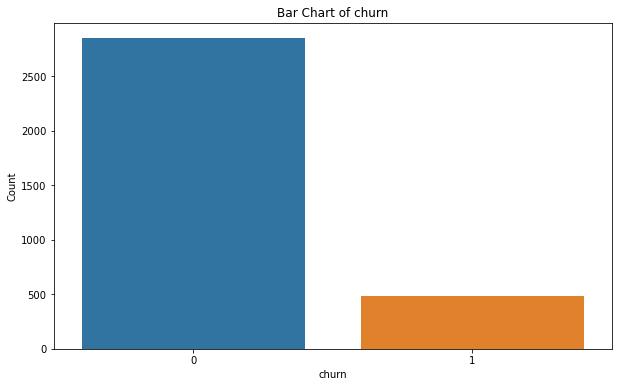

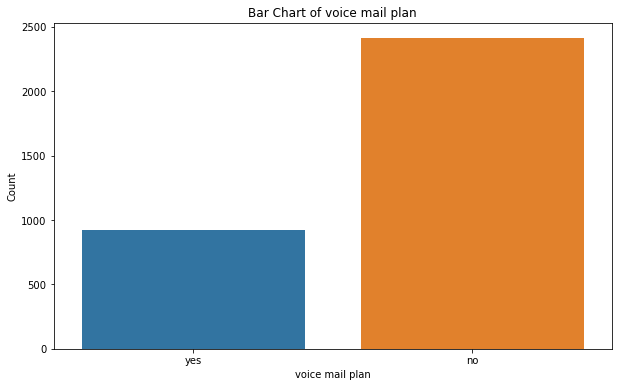

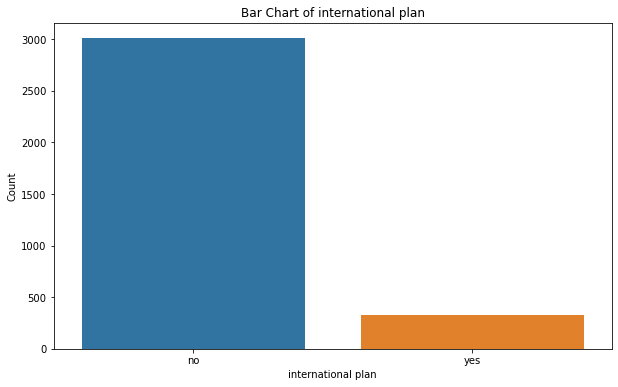

In [32]:
# Frequency Counts for Categorical Variables
def frequency_counts(df, columns):
    for col in columns:
        print(f"\nFrequency Counts for {col}:")
        print(df[col].value_counts())

# Plot Bar Charts for Categorical Variables
def plot_bar_charts(df, columns):
    for col in columns:
        if df[col].dtype == 'object' or len(df[col].unique()) < 20:
            plt.figure(figsize=(10, 6))
            sns.countplot(x=df[col])
            plt.title(f'Bar Chart of {col}')
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.show()

categorical_vars = ['churn', 'voice mail plan', 'international plan']

# Display frequency counts
frequency_counts(df, categorical_vars)

# Plot bar charts
plot_bar_charts(df, categorical_vars)


The provided data shows the frequency counts for three categorical variables: churn, voice mail plan, and international plan.

Key Findings:

Churn:

The majority of customers (28,501) did not churn, while 483 did.
Churn rate: 483 / (28501 + 483) ≈ 1.67%
Voice Mail Plan:

Most customers (2411) do not have a voice mail plan, while 922 do.
Voice mail plan adoption rate: 922 / (2411 + 922) ≈ 27.59%
International Plan:

The vast majority of customers (3010) do not have an international plan, while 323 do.
International plan adoption rate: 323 / (3010 + 323) ≈ 9.65%
Potential Insights:

Churn is relatively low: Only 1.67% of customers churned.
Voice mail plan adoption is higher: 27.59% of customers have a voice mail plan.
International plan adoption is lower: Only 9.65% of customers have an international plan.

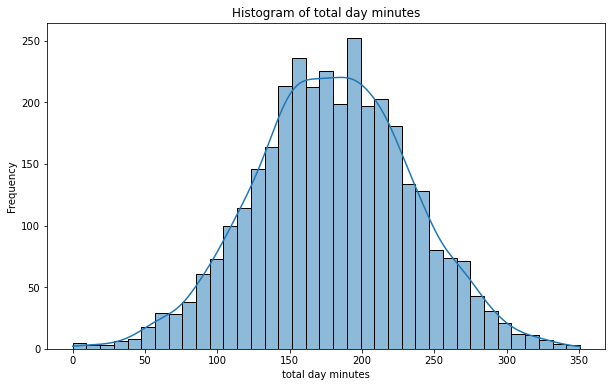

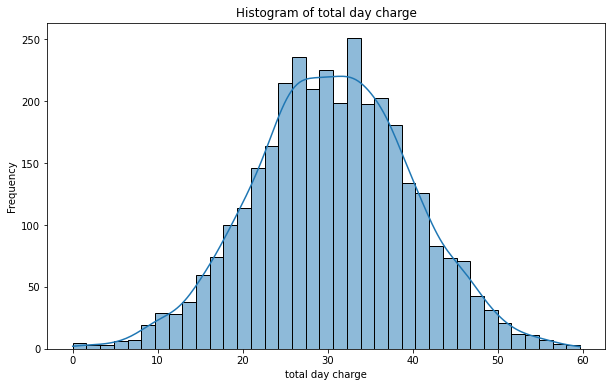

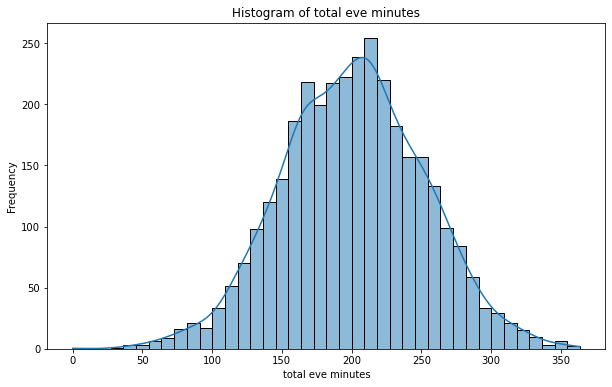

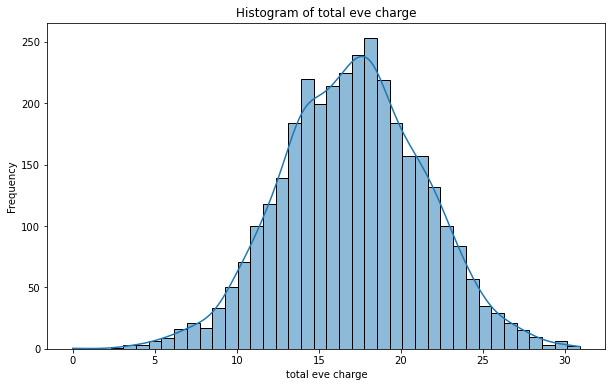

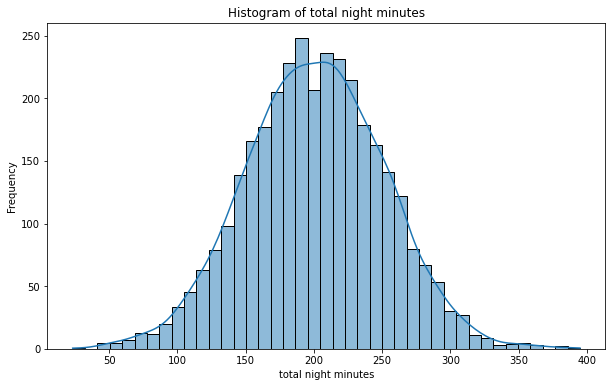

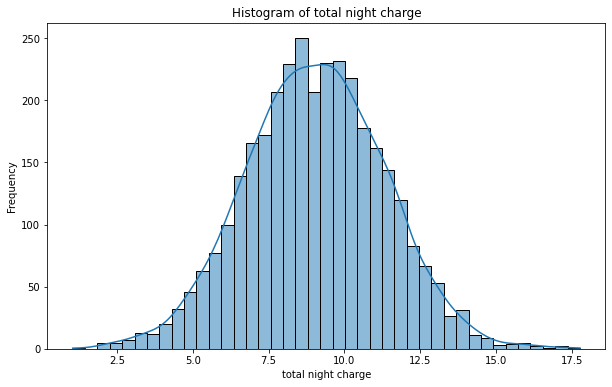

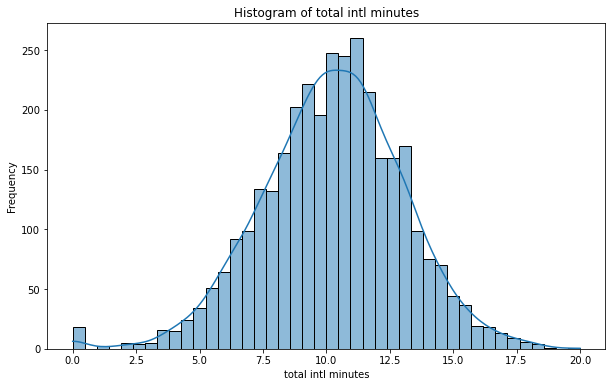

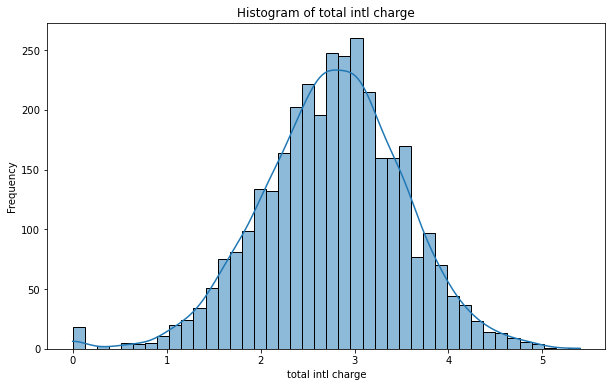

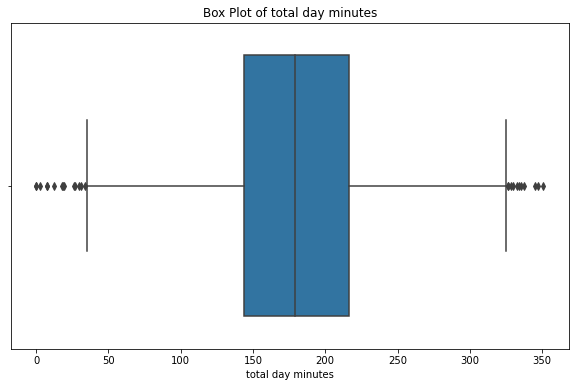

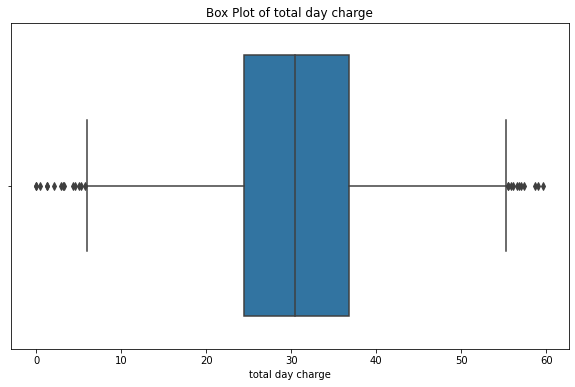

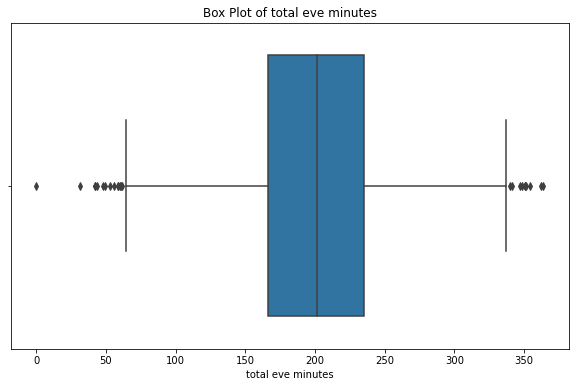

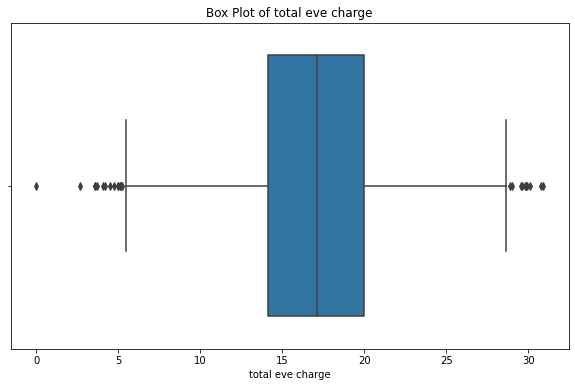

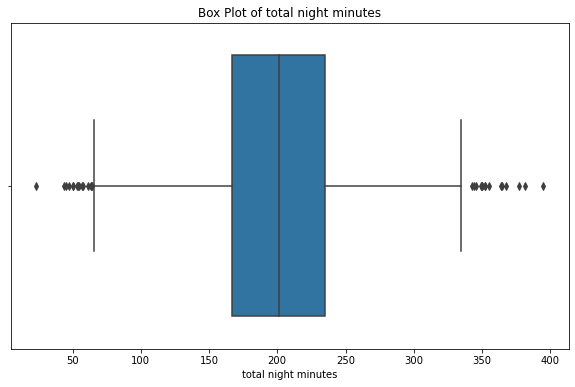

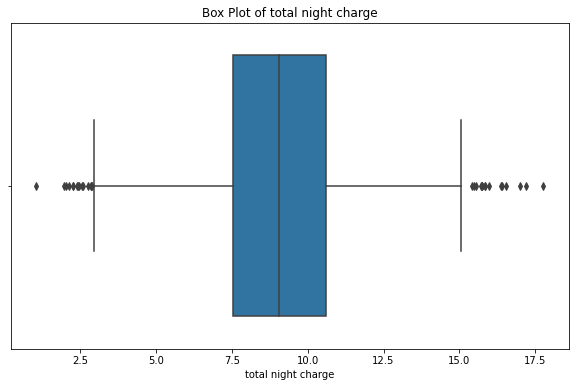

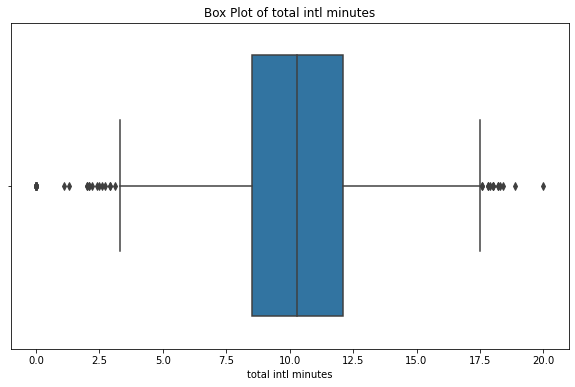

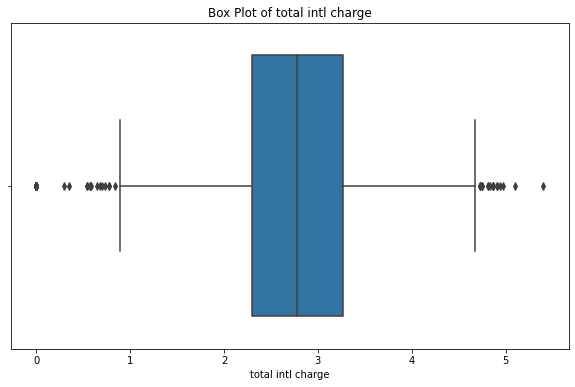

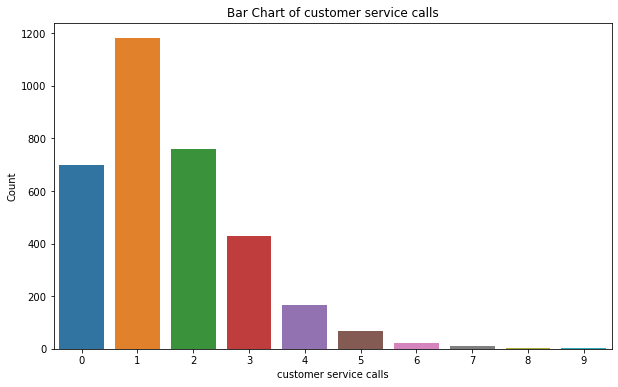

In [33]:
## univariate analysis
def plot_histograms(df, columns):
    for col in columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col], kde=True)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

def plot_boxplots(df, columns):
    for col in columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot of {col}')
        plt.xlabel(col)
        plt.show()

def plot_bar_charts(df, columns):
    for col in columns:
        if df[col].dtype == 'object' or len(df[col].unique()) < 20:
            plt.figure(figsize=(10, 6))
            sns.countplot(x=df[col])
            plt.title(f'Bar Chart of {col}')
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.show()

# Plot histograms for continuous variables
continuous_vars = [
    'total day minutes', 'total day charge', 'total eve minutes', 
    'total eve charge', 'total night minutes', 'total night charge', 
    'total intl minutes', 'total intl charge'
]

plot_histograms(df, continuous_vars)

# Plot box plots for continuous variables
plot_boxplots(df, continuous_vars)

# Plot bar charts for categorical variables
categorical_vars = ['number vmail messages', 'customer service calls']
plot_bar_charts(df, categorical_vars)


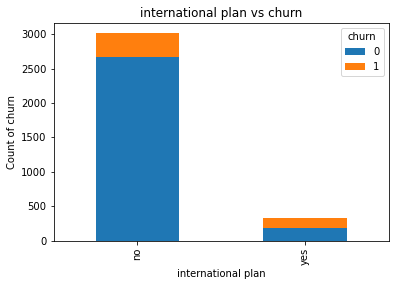

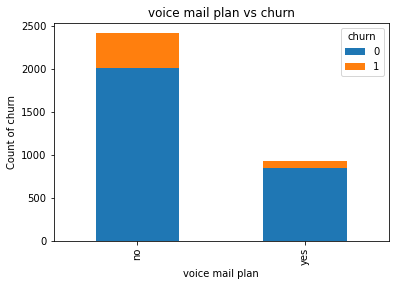

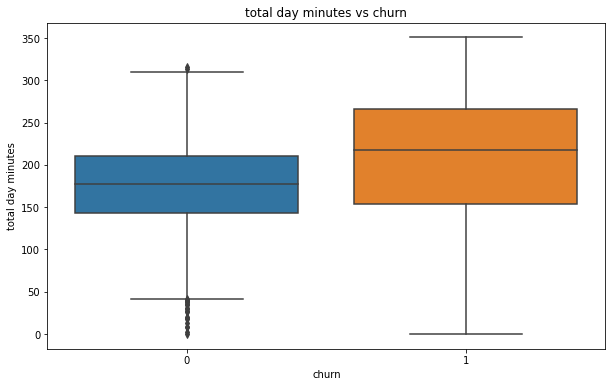

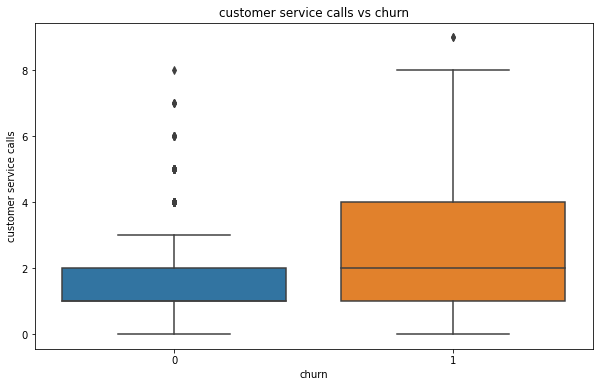

In [34]:
# Bivariate Analysis

# Categorical vs. Categorical
def categorical_vs_categorical(df, col1, col2):
    crosstab = pd.crosstab(df[col1], df[col2])
    crosstab.plot(kind='bar', stacked=True)
    plt.title(f'{col1} vs {col2}')
    plt.ylabel(f'Count of {col2}')
    plt.xlabel(col1)
    plt.show()

# Numerical vs. Categorical
def numerical_vs_categorical(df, num_col, cat_col):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=cat_col, y=num_col, data=df)
    plt.title(f'{num_col} vs {cat_col}')
    plt.xlabel(cat_col)
    plt.ylabel(num_col)
    plt.show()

# Apply Bivariate Analysis
categorical_vs_categorical(df, 'international plan', 'churn')
categorical_vs_categorical(df, 'voice mail plan', 'churn')
numerical_vs_categorical(df, 'total day minutes', 'churn')
numerical_vs_categorical(df, 'customer service calls', 'churn')


In [35]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn', 'Total charge', 'Total Talk time',
       'Total calls', 'Avg Call duration', 'voice_ms_call_ratio',
       'charge_per_call_night', 'charge_per_call_day', 'charge_per_call_eve',
       'charge_per_call_intl'],
      dtype='object')

## Data Preprocessing

In [36]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
## defining function to check for colinearity

def check_collinearity_multicollinearity(df, numeric_features, categorical_features):

    # Encode categorical features using pd.get_dummies
    df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

    # Separate numeric and encoded categorical data
    X = df_encoded[numeric_features + list(df_encoded.columns.difference(numeric_features))]

    # Standardize numeric features for VIF calculation
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_encoded[numeric_features])
    
    # Calculate VIF for numeric features
    vif_data = pd.DataFrame()
    vif_data['Feature'] = numeric_features
    vif_data['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

    print("Variance Inflation Factors (VIF) for Numeric Features:")
    print(vif_data)
    print("\n")

    # Calculate correlation matrix for combined features
    corr_matrix = X.corr()

    print("Correlation Matrix (including encoded categorical features):")
    print(corr_matrix)

    # Identify highly correlated pairs (absolute correlation > 0.8)
    high_corr_pairs = [(i, j, corr_matrix.iloc[i, j]) 
                       for i in range(corr_matrix.shape[0]) 
                       for j in range(i+1, corr_matrix.shape[1]) 
                       if abs(corr_matrix.iloc[i, j]) > 0.8]

    if high_corr_pairs:
        print("\nHighly correlated feature pairs (|correlation| > 0.8):")
        for i, j, corr in high_corr_pairs:
            print(f"{corr_matrix.columns[i]} and {corr_matrix.columns[j]}: {corr:.2f}")
    else:
        print("\nNo highly correlated feature pairs found.")

# Example usage
numeric_features = ['total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 
                    'total eve calls', 'total eve charge', 'total night minutes', 'total night calls',
                    'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 
                    'customer service calls']

categorical_features = ['international plan', 'voice mail plan']

# Assuming df is your dataframe with features
check_collinearity_multicollinearity(df, numeric_features, categorical_features)


Variance Inflation Factors (VIF) for Numeric Features:
                   Feature           VIF
0        total day minutes  1.047285e+07
1          total day calls  1.003134e+00
2         total day charge  1.047286e+07
3        total eve minutes  2.234958e+06
4          total eve calls  1.001909e+00
5         total eve charge  2.234958e+06
6      total night minutes  6.385707e+05
7        total night calls  1.001942e+00
8       total night charge  6.385694e+05
9       total intl minutes  6.900977e+04
10        total intl calls  1.002600e+00
11       total intl charge  6.901041e+04
12  customer service calls  1.001648e+00


Correlation Matrix (including encoded categorical features):
                        total day minutes  total day calls  total day charge  \
total day minutes                1.000000         0.006750          1.000000   
total day calls                  0.006750         1.000000          0.006753   
total day charge                 1.000000         0.006753          

In [37]:
#dropping columns with high colinearity

features= ['number vmail messages', 'total day minutes','total eve minutes','total night minutes','total day charge', 'total eve charge',
       'total night charge', 'total intl minutes']
df =df.drop(features,axis=1)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,total day calls,total eve calls,total night calls,total intl calls,total intl charge,customer service calls,churn,Total charge,Total Talk time,Total calls,Avg Call duration,voice_ms_call_ratio,charge_per_call_night,charge_per_call_day,charge_per_call_eve,charge_per_call_intl
0,KS,128,415,382-4657,no,yes,110,99,91,3,2.70,1,0,75.56,717.2,303,2.366997,0.082508,0.044994,0.170011,0.085005,0.270000
1,OH,107,415,371-7191,no,yes,123,103,103,3,3.70,1,0,59.24,625.2,332,1.883133,0.078313,0.045008,0.169988,0.085013,0.270073
2,NJ,137,415,358-1921,no,no,114,110,104,5,3.29,0,0,62.29,539.4,333,1.619820,0.000000,0.045018,0.170008,0.084983,0.269672
3,OH,84,408,375-9999,yes,no,71,88,89,7,1.78,2,0,66.80,564.8,255,2.214902,0.000000,0.044997,0.170007,0.084976,0.269697
4,OK,75,415,330-6626,yes,no,113,122,121,3,2.73,3,0,52.09,512.0,359,1.426184,0.000000,0.044997,0.170006,0.085030,0.270297


In [38]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'total day calls',
       'total eve calls', 'total night calls', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn', 'Total charge',
       'Total Talk time', 'Total calls', 'Avg Call duration',
       'voice_ms_call_ratio', 'charge_per_call_night', 'charge_per_call_day',
       'charge_per_call_eve', 'charge_per_call_intl'],
      dtype='object')

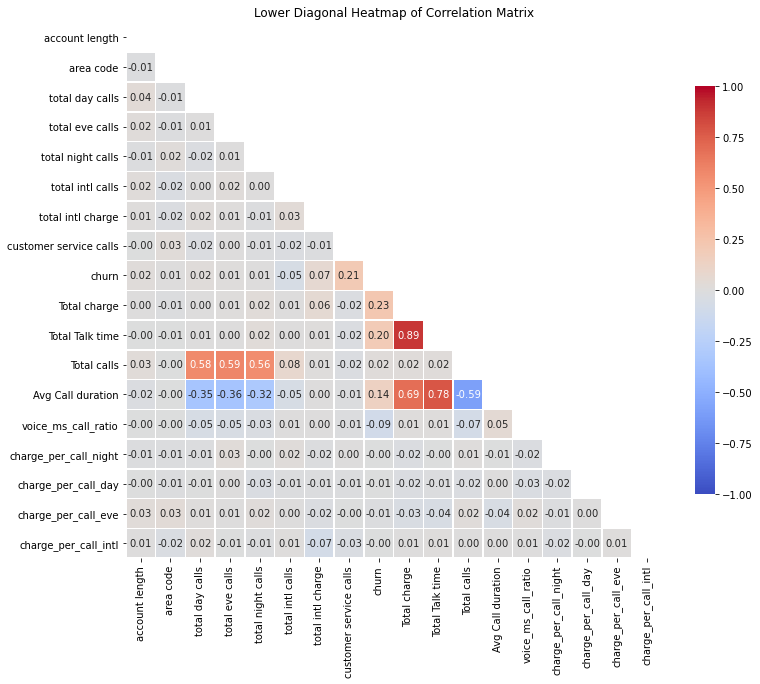

In [39]:
# Compute the correlation matrix for the remaining features
corr = df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": .75})

# Show the plot
plt.title('Lower Diagonal Heatmap of Correlation Matrix')
plt.show()

In [40]:
# Get the percentage distribution of the churn variable
churn_percentage = df["churn"].value_counts(normalize=True) * 100

# Print the result
print(churn_percentage)


0    85.508551
1    14.491449
Name: churn, dtype: float64


In [41]:
# checking for null values
df.isna().sum()

state                      0
account length             0
area code                  0
phone number               0
international plan         0
voice mail plan            0
total day calls            0
total eve calls            0
total night calls          0
total intl calls           0
total intl charge          0
customer service calls     0
churn                      0
Total charge               0
Total Talk time            0
Total calls                0
Avg Call duration          0
voice_ms_call_ratio        0
charge_per_call_night      0
charge_per_call_day        2
charge_per_call_eve        1
charge_per_call_intl      18
dtype: int64

In [42]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
total day calls             int64
total eve calls             int64
total night calls           int64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int32
Total charge              float64
Total Talk time           float64
Total calls                 int64
Avg Call duration         float64
voice_ms_call_ratio       float64
charge_per_call_night     float64
charge_per_call_day       float64
charge_per_call_eve       float64
charge_per_call_intl      float64
dtype: object

In [43]:
# handling null values
from sklearn.impute import SimpleImputer

# Separate numeric and categorical columns
numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Numeric imputer (using median)
numeric_imputer = SimpleImputer(strategy='median')
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

# Categorical imputer (using most frequent value or mode)
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

# Verify there are no more missing values
print("Missing values in each column after imputation:\n", df.isnull().sum())


Missing values in each column after imputation:
 state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
total day calls           0
total eve calls           0
total night calls         0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
Total charge              0
Total Talk time           0
Total calls               0
Avg Call duration         0
voice_ms_call_ratio       0
charge_per_call_night     0
charge_per_call_day       0
charge_per_call_eve       0
charge_per_call_intl      0
dtype: int64


# scaling and encoding our data

In [44]:
# Separate target variable if it's present
target = 'churn'  # Replace with your actual target column name
X = df.drop(columns=[target])
y = df[target]

# Separate numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'bool']).columns

# Scale numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Encode categorical features using pd.get_dummies
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)


In [45]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [46]:
# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


## Modelling

In [47]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Create a dummy classifier that always predicts the most frequent class
baseline_model = DummyClassifier(strategy='most_frequent', random_state=42)
baseline_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_baseline = baseline_model.predict(X_test)

# Calculate metrics
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
roc_auc_baseline = roc_auc_score(y_test, y_pred_baseline)

print("Baseline Model Metrics:")
print(f"Accuracy: {accuracy_baseline:.4f}")
print(f"ROC AUC: {roc_auc_baseline:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_baseline))
print("Classification Report:\n", classification_report(y_test, y_pred_baseline))


Baseline Model Metrics:
Accuracy: 0.8546
ROC AUC: 0.5000
Confusion Matrix:
 [[570   0]
 [ 97   0]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       570
         1.0       0.00      0.00      0.00        97

    accuracy                           0.85       667
   macro avg       0.43      0.50      0.46       667
weighted avg       0.73      0.85      0.79       667



In [48]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

def evaluate_decision_tree(X_train, y_train, X_test, y_test):
    from sklearn.tree import DecisionTreeClassifier
    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_train, y_train)
    y_pred = dt_model.predict(X_test)
    print("Decision Tree Metrics:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")

def evaluate_logistic_regression(X_train, y_train, X_test, y_test):
    from sklearn.linear_model import LogisticRegression
    lr_model = LogisticRegression(random_state=42)
    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_test)
    print("Logistic Regression Metrics:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")

def evaluate_random_forest(X_train, y_train, X_test, y_test):
    from sklearn.ensemble import RandomForestClassifier
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    print("Random Forest Metrics:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")

def evaluate_gradient_boosting(X_train, y_train, X_test, y_test):
    from sklearn.ensemble import GradientBoostingClassifier
    gb_model = GradientBoostingClassifier(random_state=42)
    gb_model.fit(X_train, y_train)
    y_pred = gb_model.predict(X_test)
    print("Gradient Boosting Metrics:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")


In [49]:
# Evaluate each model
evaluate_decision_tree(X_train, y_train, X_test, y_test)
evaluate_logistic_regression(X_train, y_train, X_test, y_test)
evaluate_random_forest(X_train, y_train, X_test, y_test)
evaluate_gradient_boosting(X_train, y_train, X_test, y_test)


Decision Tree Metrics:
Accuracy: 0.9685
ROC AUC: 0.8918
Confusion Matrix:
 [[570   0]
 [ 21  76]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       570
         1.0       1.00      0.78      0.88        97

    accuracy                           0.97       667
   macro avg       0.98      0.89      0.93       667
weighted avg       0.97      0.97      0.97       667



Logistic Regression Metrics:
Accuracy: 0.8636
ROC AUC: 0.6036
Confusion Matrix:
 [[553  17]
 [ 74  23]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.97      0.92       570
         1.0       0.57      0.24      0.34        97

    accuracy                           0.86       667
   macro avg       0.73      0.60      0.63       667
weighted avg       0.84      0.86      0.84       667



Random Forest Metrics:
Accuracy: 0.9130
ROC AUC: 0.7053
Confusion Matrix:
 [[569   1]
 [ 57 

Interpreting the Model Performance Metrics
Understanding the Metrics:

Accuracy: The overall proportion of correct predictions.
ROC AUC: Measures the model's ability to distinguish between positive and negative classes.
Confusion Matrix: Shows the number of correct and incorrect predictions for each class.
Classification Report: Provides precision, recall, F1-score, and support for each class.
Comparing Model Performance:

Accuracy: Decision Tree and Gradient Boosting have the highest accuracy (0.9685).
ROC AUC: Decision Tree and Gradient Boosting also have the highest ROC AUC (0.8918), indicating good discrimination between classes.
Precision and Recall:
Precision: Measures the proportion of positive predictions that are actually positive. Decision Tree and Gradient Boosting have high precision for class 0, while Random Forest has high precision for class 1.
Recall: Measures the proportion of actual positive cases that are correctly predicted. Decision Tree and Gradient Boosting have high recall for both classes.
F1-score: The harmonic mean of precision and recall. Decision Tree and Gradient Boosting have high F1-scores for class 0, while Random Forest has a lower F1-score for class 1.
Key Insights:

Decision Tree and Gradient Boosting: These models perform exceptionally well in terms of accuracy, ROC AUC, precision, and recall for both classes.
Logistic Regression: While it has a lower accuracy and ROC AUC, it might be useful for interpretability.
Random Forest: It performs well for class 0 but struggles with class 1, particularly in terms of recall.
Choosing the Best Model:

The choice of the best model depends on your specific priorities. If you value overall accuracy and performance for both classes, Decision Tree or Gradient Boosting would be good options. If interpretability is important, Logistic Regression might be considered.

Further Analysis:

Feature Importance: Analyze the feature importance for each model to understand which factors contribute most to the predictions.
Hyperparameter Tuning: Experiment with different hyperparameters to potentially improve model performance.
Cross-Validation: Use cross-validation to assess the model's generalization ability.
By carefully considering these factors, you can select the most appropriate model for your specific use case and gain valuable insights from the analysis.

In [50]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:\n", best_params)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters:
 {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}


Best Decision Tree Metrics with Best Parameters:
Accuracy: 0.9205
ROC AUC: 0.8825
Confusion Matrix:
 [[536  34]
 [ 19  78]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.94      0.95       570
         1.0       0.70      0.80      0.75        97

    accuracy                           0.92       667
   macro avg       0.83      0.87      0.85       667
weighted avg       0.93      0.92      0.92       667



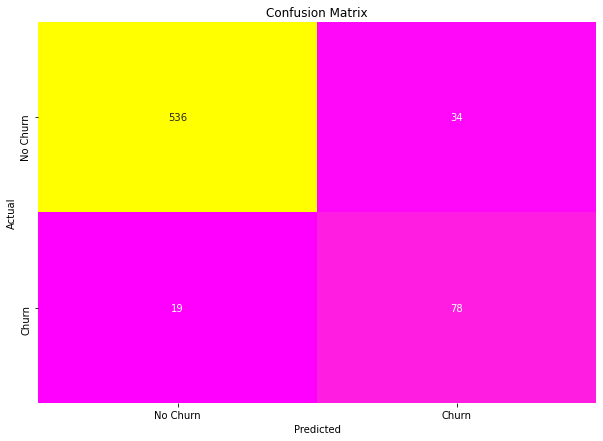

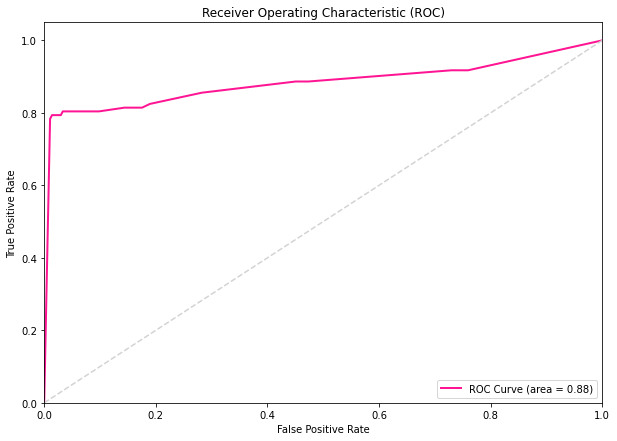

In [51]:
best_params = {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
dt_model_best = DecisionTreeClassifier(**best_params, random_state=42)

# Train the model
dt_model_best.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_best = dt_model_best.predict(X_test)
y_pred_prob_best = dt_model_best.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

# Calculate metrics
accuracy_best = accuracy_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_prob_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

print("Best Decision Tree Metrics with Best Parameters:")
print(f"Accuracy: {accuracy_best:.4f}")
print(f"ROC AUC: {roc_auc_best:.4f}")
print("Confusion Matrix:\n", conf_matrix_best)
print("Classification Report:\n", classification_report(y_test, y_pred_best))

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='spring', cbar=False, 
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_best)
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='deeppink', lw=2, label='ROC Curve (area = %0.2f)' % roc_auc_best)
plt.plot([0, 1], [0, 1], color='lightgray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

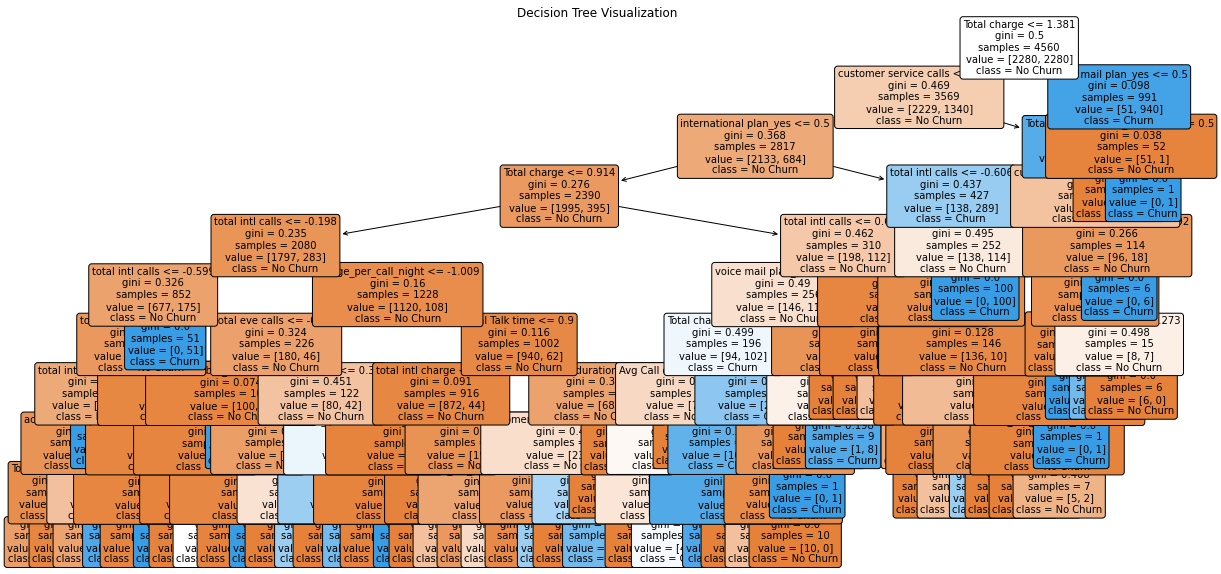

In [52]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model_best, filled=True, feature_names=X_train_resampled.columns, class_names=['No Churn', 'Churn'], rounded=True, fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()


Starting RandomizedSearchCV...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Completed RandomizedSearchCV in 12.35 seconds.
Best Logistic Regression Metrics:
Accuracy: 0.8576
ROC AUC: 0.8176
Confusion Matrix:
 [[555  15]
 [ 80  17]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.97      0.92       570
         1.0       0.53      0.18      0.26        97

    accuracy                           0.86       667
   macro avg       0.70      0.57      0.59       667
weighted avg       0.82      0.86      0.83       667



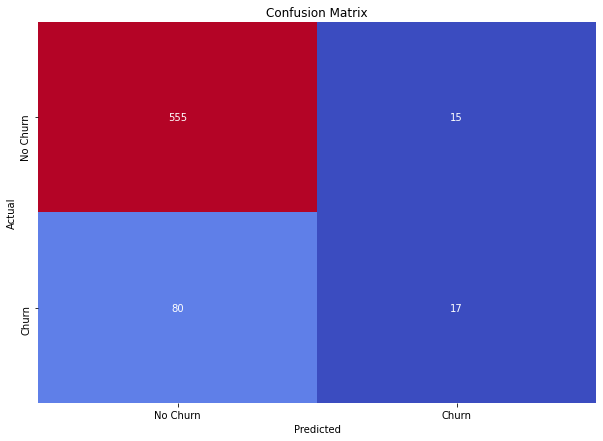

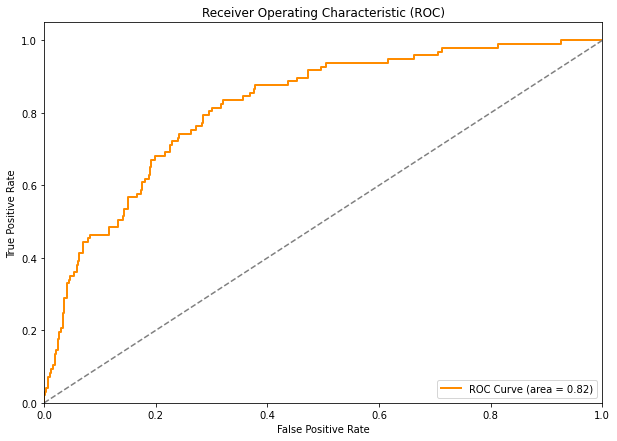

In [59]:
from sklearn.model_selection import RandomizedSearchCV
import time

def tune_logistic_regression(X_train, y_train, X_test, y_test):
    # Simplify the hyperparameters and their ranges
    param_grid = {
        'penalty': ['l2'],  # Simplified to only 'l2' for faster computation
        'C': [0.1, 1, 10],  # Reduced number of C values
        'solver': ['liblinear'],  # 'liblinear' is faster and works with 'l2'
        'max_iter': [100, 200]  # Reduced max iterations
    }
    
    # Initialize Logistic Regression model
    log_reg = LogisticRegression(random_state=42)
    
    # Set up RandomizedSearchCV
    random_search = RandomizedSearchCV(log_reg, param_grid, cv=3, scoring='roc_auc', n_jobs=-1, n_iter=10, verbose=1)
    
    # Time the model fitting process
    start_time = time.time()
    
    # Fit the model
    print("Starting RandomizedSearchCV...")
    random_search.fit(X_train, y_train)
    print(f"Completed RandomizedSearchCV in {time.time() - start_time:.2f} seconds.")
    
    # Get the best model
    best_log_reg = random_search.best_estimator_
    
    # Make predictions
    y_pred = best_log_reg.predict(X_test)
    y_pred_prob = best_log_reg.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print("Best Logistic Regression Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Plot Confusion Matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', cbar=False, 
                xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.figure(figsize=(10, 7))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()
    
    return best_log_reg, accuracy, roc_auc

# Call the function
best_log_reg_model, best_accuracy, best_roc_auc = tune_logistic_regression(X_train, y_train, X_test, y_test)


In [66]:
def tune_and_evaluate_model(model, param_grid, X_train, y_train, X_test, y_test, n_iter=10, cv=3):
    """
    Function to perform hyperparameter tuning using RandomizedSearchCV, train the model, evaluate performance,
    and plot the confusion matrix and ROC curve.
    
    Parameters:
    - model: the machine learning model to be tuned.
    - param_grid: dictionary containing hyperparameters and their ranges.
    - X_train: training features.
    - y_train: training labels.
    - X_test: testing features.
    - y_test: testing labels.
    - n_iter: number of parameter settings sampled during RandomizedSearchCV (default: 10).
    - cv: number of cross-validation folds (default: 3).
    
    Returns:
    - best_model: the model with the best hyperparameters.
    - accuracy: accuracy of the best model on the test set.
    - roc_auc: ROC AUC score of the best model on the test set.
    """
    
    # Set up RandomizedSearchCV
    random_search = RandomizedSearchCV(model, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, n_iter=n_iter, verbose=3)
    
    # Time the model fitting process
    start_time = time.time()
    
    # Fit the model
    print(f"Starting RandomizedSearchCV for {model.__class__.__name__}...")
    random_search.fit(X_train, y_train)
    print(f"Completed RandomizedSearchCV in {time.time() - start_time:.2f} seconds.")
    
    # Get the best model
    best_model = random_search.best_estimator_
    print(f"Best Parameters Found: {random_search.best_params_}")
    
    # Make predictions
    y_pred = best_model.predict(X_test)
    y_pred_prob = best_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f"Best {model.__class__.__name__} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Plot Confusion Matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='spring', cbar=False, 
                xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.figure(figsize=(10, 7))
    plt.plot(fpr, tpr, color='deeppink', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='lightgray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()
    
    return best_model, accuracy, roc_auc


Starting RandomizedSearchCV for RandomForestClassifier...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Completed RandomizedSearchCV in 127.98 seconds.
Best Parameters Found: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': False}
Best RandomForestClassifier Metrics:
Accuracy: 0.8981
ROC AUC: 0.9207
Confusion Matrix:
 [[570   0]
 [ 68  29]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       570
         1.0       1.00      0.30      0.46        97

    accuracy                           0.90       667
   macro avg       0.95      0.65      0.70       667
weighted avg       0.91      0.90      0.87       667



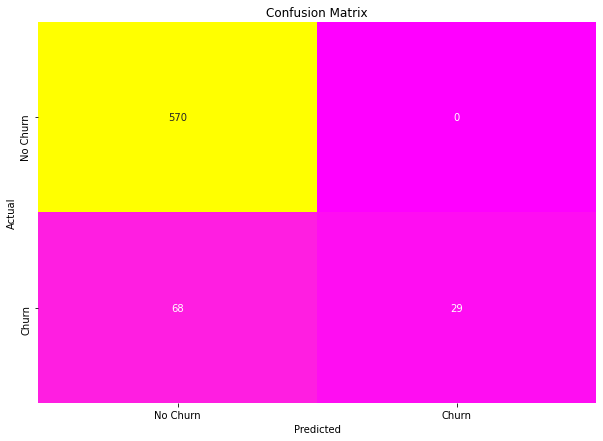

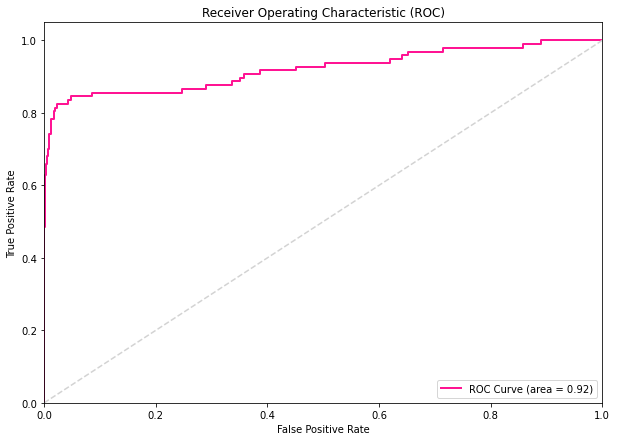

In [67]:
# Define the hyperparameters and their respective ranges
param_grid_rf = {
    'n_estimators': [100, 200, 500],  # Number of trees in the forest
    'max_depth': [10, 20, 30],        # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]        # Whether bootstrap samples are used when building trees
}

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Run hyperparameter tuning and evaluation
best_rf_model, best_accuracy_rf, best_roc_auc_rf = tune_and_evaluate_model(
    model=rf_model,
    param_grid=param_grid_rf,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    n_iter=10,  # Number of parameter settings to sample
    cv=3        # Number of cross-validation folds
)


Starting RandomizedSearchCV for GradientBoostingClassifier...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Completed RandomizedSearchCV in 428.46 seconds.
Best Parameters Found: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 5, 'learning_rate': 0.1}
Best GradientBoostingClassifier Metrics:
Accuracy: 0.9700
ROC AUC: 0.9281
Confusion Matrix:
 [[570   0]
 [ 20  77]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       570
         1.0       1.00      0.79      0.89        97

    accuracy                           0.97       667
   macro avg       0.98      0.90      0.93       667
weighted avg       0.97      0.97      0.97       667



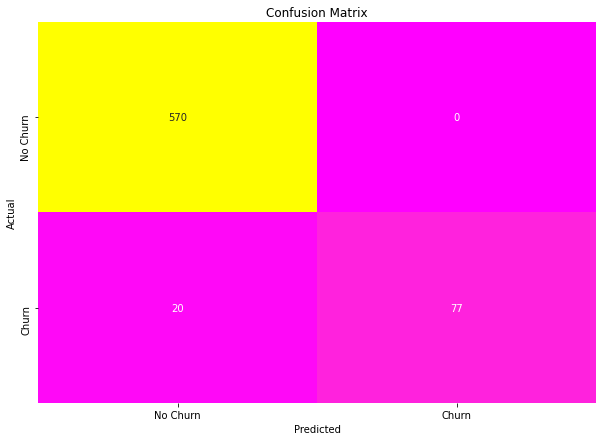

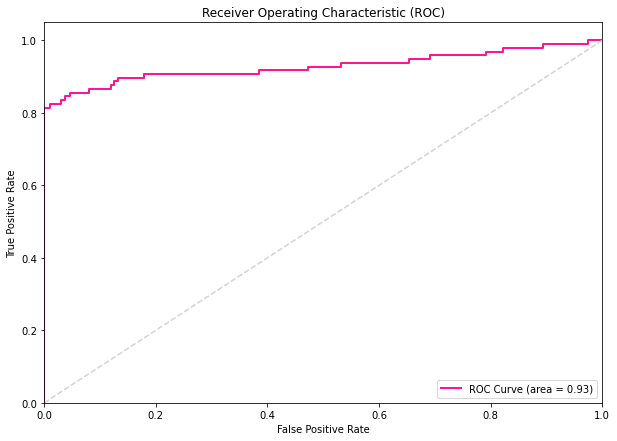

In [68]:
# Define the hyperparameters and their respective ranges
param_grid_gb = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 5, 7],           # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required to be at a leaf node
}

# Initialize Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Run hyperparameter tuning and evaluation
best_gb_model, best_accuracy_gb, best_roc_auc_gb = tune_and_evaluate_model(
    model=gb_model,
    param_grid=param_grid_gb,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    n_iter=10,  # Number of parameter settings to sample
    cv=3        # Number of cross-validation folds
)

